# Logistic Regression

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, _y_, to some predictors (independent variables _x1_, _x2_, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 * x1 + w2 * x2 +...
$$
<br>
and finds the values of _w0_, _w1_, _w2_, etc. The term _w0_ is the "intercept" or "constant term" (it's shown as _b_ in the formula below):
<br><br>
$$
Y = WX + b
$$
<p></p>

</div>

Despite the name logistic _regression_, it is actually a __probabilistic classification__ model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1+e^y} = exp(y) / (1+exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity) and 1 (as y approaches plus infinity). This now becomes a special kind of non-linear regression.

In this equation, _y_ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\theta(y)$ is the [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modelling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-x}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png", width = "400", align = "center">

## Logistic Regression in TensorFlow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Data

Load the "iris" dataset.

Separate into training and testing with a sklearn module.

In [2]:
iris = load_iris()
iris_X = iris.data[:-1,:]
iris_y = iris.target[:-1]
'''
pd.get_dummies(): Convert categorical variable into dummy/indicator variables
'''
iris_y = pd.get_dummies(iris_y).values # <- ONE HOT ENCODING

#Train/Test split with Sklearn

trainX, testX, trainY, testY = train_test_split(iris_X,iris_y,test_size=0.33,random_state=42)

print('DATA SAMPLES:')
print('Train Sample:')
list(zip(trainX,trainY))[0:5]


DATA SAMPLES:
Train Sample:


[(array([ 5.7,  3. ,  4.2,  1.2]), array([0, 1, 0], dtype=uint8)),
 (array([ 6.5,  3. ,  5.8,  2.2]), array([0, 0, 1], dtype=uint8)),
 (array([ 5.6,  3. ,  4.5,  1.5]), array([0, 1, 0], dtype=uint8)),
 (array([ 5.1,  3.5,  1.4,  0.2]), array([1, 0, 0], dtype=uint8)),
 (array([ 6.9,  3.1,  5.1,  2.3]), array([0, 0, 1], dtype=uint8))]

### Placeholders

Now let's define "x" and "y". These placeholders will hold the iris data (features and labels). 

It can be considered as empty shells into which we insert data.

It's needed to give them shapes which correspond to the shape of the data. Later, data will be inserted in the placeholders with the 'feed dict'.

**Why placeholders?**

1) Allows to create an algorithm which accepts data and knows something about the shape of the data without knowing the amoint of data going in.

2) For "batch" training, it's easy to adjust how many examples we train on in a single step without changing the entire algorithm.

In [3]:
#NumFeatures: Number of features in the dataset (petal_width,petal_lenght,sepal_width,sepal_length => 4)
print ('Features: ',trainX.shape,'=> 99 observations x 4 features each observation')
numFeatures = trainX.shape[1]

#NumLabels: Number of possible classes (setosa,virginica,versicolor => 3)
print ('Classes: ',trainY.shape,'=> 99 observations x 3 possible classes')
numLabels = trainY.shape[1]

print('\nnumFeatures: %d' % numFeatures)
print('numLabels: %d' % numLabels)

#Placeholders
#'None' means: TF shouldn't expect a fixed number in that dimension --> Any number of observartions
x = tf.placeholder(dtype=tf.float32, shape=[None,numFeatures],name='x') #Iris has 4 features, so X is a tensor to hold the data
yGold = tf.placeholder(dtype=tf.float32,shape=[None,numLabels],name='yGold') #Iris has 3 classes, is a tensor to hold the correct classes



Features:  (99, 4) => 99 observations x 4 features each observation
Classes:  (99, 3) => 99 observations x 3 possible classes

numFeatures: 4
numLabels: 3


### Set model Weights and Bias

We need a shared variable weight matrix and bias. We initialize both W and b as Tensors full of zeros. Since we are going to learn W and b, their initial values doesn't matter too much.

These variables are the objects which define the structure of the model, they can be saved after they've trained and be reused later.

**Shapes:**

W has shape [4,3] because we want to:

    -> Multiply the 4-dimensional input vector by it to produce 3-dimensional vectors of evidence for the possible classes.

b has shape [3] so we can:

    -> Add it to the output.


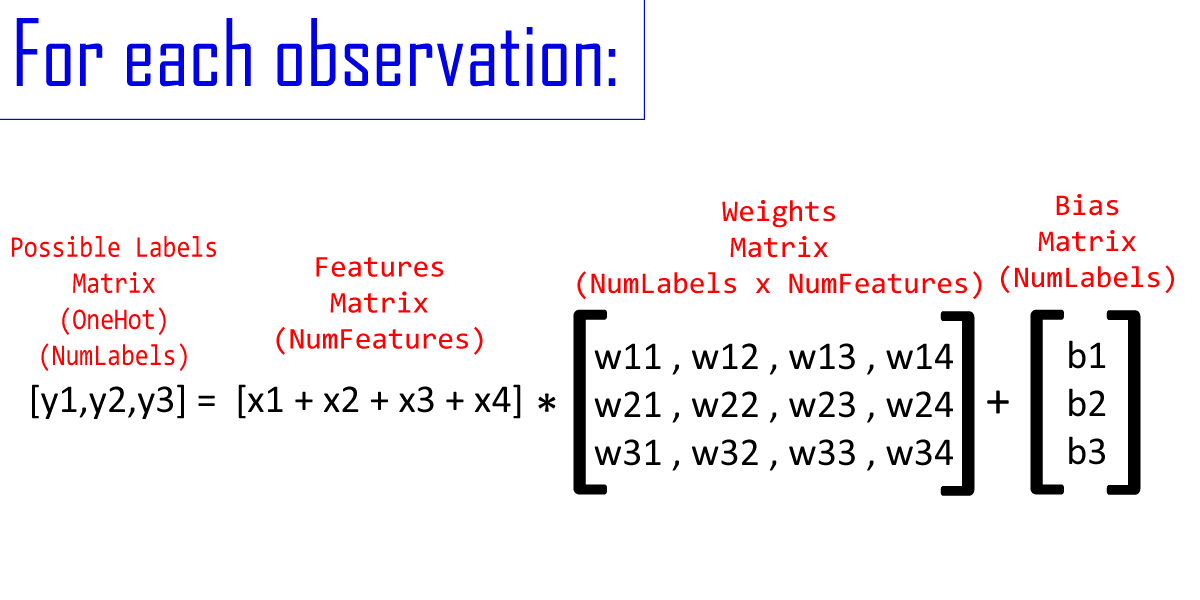

In [4]:
#Shapes: Columns x Rows
W = tf.Variable(tf.zeros(shape=[numFeatures,numLabels]),name='W') #Weights: 4 x 3
b = tf.Variable(tf.zeros(shape=[numLabels]),name='b') #Bias: 3

#Randomly sample from a normal distribution with standar deviation 0.01
weights = tf.Variable(tf.random_normal(shape=[numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name='weights'))

bias = tf.Variable(tf.random_normal(shape=[1,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name='bias'))

### Logistic Regression Model

Define operations according to:

$$
ŷ =sigmoid(WX+b)
$$

However, it can be broken into:

 - a features * weight matrix multiplication operation
 - a summation of the weightened features and the bias term
 - the application of sigmoid

In [5]:
#1. a features * weight matrix multiplication operation 
apply_weights_OP = tf.matmul(x,weights,name='apply_weights')#SE UTILIZA LA DE NORMAL DIST

#2. a summation of the weightened features and the bias term
add_bias_OP = tf.add(apply_weights_OP,bias,name='add_bias')#SE UTILIZA LA DE NORMAL DIST

#3. the application of sigmoid
activation_OP = tf.nn.sigmoid(add_bias_OP,name='activation')

Sigmoid fits the weight input with bias into a 0-100 percent curve, which is the probabilty function we want

### Training 

The learning algorithm is how we search for the best weight vector (**W**). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

**What tell us our model is bad?**

The Cost or Loss of the model, so what we want is to minimize that

**What is the cost function in our model?**

The cost function we are going to use is the Squared Mean Error loss function

**How to minimize the cost function?**

With the Gradient Descent function

#### Cost function

Plus define the epochs and learning rate hyper params

In [23]:
numEpochs = 701

#tf.exponential_decay: Applies exponential decay to the learning rate.
learning_rate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step=1,
                                          decay_steps=trainX.shape[0],
                                           decay_rate=0.95,
                                           staircase=True)

In [24]:
#Cost function
cost_OP = tf.nn.l2_loss(activation_OP-yGold,name='squared_error_cost')

#Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_OP)

#### Train

Prediction phase

In [25]:
#Create session, initialize and run session
sess = tf.Session()
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

Some additional operations to keep track of our model's efficiency over time

 - Accuracy over time (summary)
     - Correct predictions
     - Accuracy
 - Activation over time (summary)
 - Cost over time (summary)
 - Weight and Bias over time (summary)

In [26]:
#Summary OP for accuracy

#argmax(activation_OP,1) returns the label with the most probability
#argmax(yGold,1) return the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

#If false predictions are 0 and correct predictions are 1 -> The average is the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP,'float'))

accuracy_summary_OP = tf.summary.scalar("accuracy",accuracy_OP)


#Summary OP for regression output
activation_summary_OP = tf.summary.histogram("output",activation_OP)

#Summary OP for cost
cost_summary_OP = tf.summary.scalar("cost",cost_OP)

#Summary OPs to chech how (Weight,bias) are updating after each iteration 
weightSummary = tf.summary.histogram("weights",weights.eval(session=sess)) #SE USAN LOS DE LA NORMAL DIST
biasSummary = tf.summary.histogram("bias",bias.eval(session=sess)) #SE USAN LOS DE LA NORMAL DIST

#MERGE ALL SUMMARIES
merged = tf.summary.merge([activation_summary_OP,accuracy_summary_OP,cost_summary_OP,weightSummary,biasSummary])

#Summary writer
writer = tf.summary.FileWriter("summary_logs",sess.graph)


#### Training loop

In [27]:
#Initialize aux variables
cost = 0 #Store the current cost value
diff = 1 #Store the diff between the last and the current cost

epoch_values = [] #List with the epochs for live graphing
accuracy_values = [] #List with the accuracies for live graphing
cost_values = [] #List with the costs for live graphing

#Feed the Placeholders
feed = {x : trainX, yGold : trainY}

#Training epochs
for i in range(numEpochs):
    if(i > 1 and diff < .0001): #Loop until numSteps or convergence
        print('Change in cost &g; convergence.' % diff)
        break
    else:
        #Run training single step
        step = sess.run(fetches=training_OP,feed_dict=feed)
        
        #Report occasional stats
        if (i % 10 == 0):
            #Add current epoch
            epoch_values.append(i)
            #Generate accuracy stats on train data
            train_accuracy,newCost = sess.run(fetches=[accuracy_OP,cost_OP],feed_dict=feed)
            #Add accuracy and cost to the lists for live graphing
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            
            #Updates aux variables
            diff = abs(newCost - cost)
            cost = newCost
            
            #Print smthng
            print("At step %d, training accuracy %g, cost %g, change in cost %g" %(i,train_accuracy,newCost,diff))
            
            
#On TEST data?
test_accuracy = sess.run(fetches=[accuracy_OP],feed_dict={x : testX, yGold : testY})
print('Final accuracy on test set %g' %test_accuracy[0])
            
        
        
        
        
        
        
        
        
        
        

At step 0, training accuracy 0.333333, cost 34.8778, change in cost 34.8778
At step 10, training accuracy 0.50505, cost 30.2257, change in cost 4.65206
At step 20, training accuracy 0.646465, cost 28.2781, change in cost 1.94756
At step 30, training accuracy 0.646465, cost 26.6267, change in cost 1.65141
At step 40, training accuracy 0.646465, cost 25.2498, change in cost 1.37696
At step 50, training accuracy 0.646465, cost 24.1097, change in cost 1.14008
At step 60, training accuracy 0.646465, cost 23.1648, change in cost 0.944864
At step 70, training accuracy 0.646465, cost 22.3772, change in cost 0.787622
At step 80, training accuracy 0.646465, cost 21.7151, change in cost 0.662106
At step 90, training accuracy 0.646465, cost 21.1531, change in cost 0.561947
At step 100, training accuracy 0.666667, cost 20.6714, change in cost 0.481716
At step 110, training accuracy 0.666667, cost 20.2544, change in cost 0.416998
At step 120, training accuracy 0.666667, cost 19.8901, change in cost 

#### See how the cost has behaved with a plot

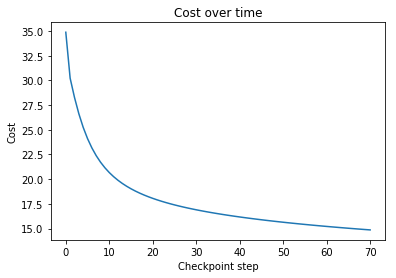

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(cost_values)
plt.title('Cost over time')
plt.ylabel('Cost')
plt.xlabel('Checkpoint step')
plt.show()

#### See how the acc has behaved with a plot

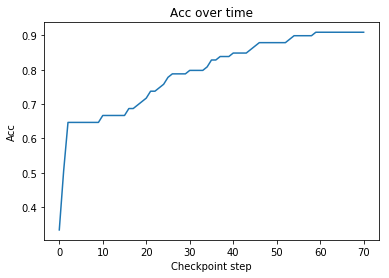

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(accuracy_values)
plt.title('Acc over time')
plt.ylabel('Acc')
plt.xlabel('Checkpoint step')
plt.show()